In [0]:
# Creacion de  DataFrames
# Se importan todas las clases del modulo sql
from pyspark.sql import *

# Ejemplo - Departments y Employees

# Se crean los Departments, Row es un objeto de fila genérico 
# con una colección ordenada de campos a los que se puede acceder 
# mediante un índice ordinal.
# Row también se llama Catalyst Row. La fila puede tener un esquema opcional.
department1 = Row(id='123456', name='Computer Science')
department2 = Row(id='789012', name='Mechanical Engineering')
department3 = Row(id='345678', name='Theater and Drama')
department4 = Row(id='901234', name='Indoor Recreation')

# Se crean los Employees
Employee = Row("firstName", "lastName", "email", "salary")
employee1 = Employee('michael', 'armbrust', 'no-reply@berkeley.edu', 100000)
employee2 = Employee('xiangrui', 'meng', 'no-reply@stanford.edu', 120000)
employee3 = Employee('matei', None, 'no-reply@waterloo.edu', 140000)
employee4 = Employee(None, 'wendell', 'no-reply@berkeley.edu', 160000)
employee5 = Employee('michael', 'jackson', 'no-reply@neverla.nd', 80000)

# Se crean las instancias DepartmentWithEmployees a partir de Departments y Employees
# "employees" es una lista de Row, la lista es un objeto array
departmentWithEmployees1 = Row(department=department1, employees=[employee1, employee2])
departmentWithEmployees2 = Row(department=department2, employees=[employee3, employee4])
departmentWithEmployees3 = Row(department=department3, employees=[employee5, employee4])
departmentWithEmployees4 = Row(department=department4, employees=[employee2, employee3])

print(department1)
print(employee2)
print(departmentWithEmployees1.employees[0].email)

Row(id='123456', name='Computer Science')
Row(firstName='xiangrui', lastName='meng', email='no-reply@stanford.edu', salary=120000)
no-reply@berkeley.edu

In [0]:
# Creacion de 2 DataFrames a partir de listas de row
departmentsWithEmployeesSeq1 = [departmentWithEmployees1, departmentWithEmployees2]
df1 = spark.createDataFrame(departmentsWithEmployeesSeq1)

display(df1)

departmentsWithEmployeesSeq2 = [departmentWithEmployees3, departmentWithEmployees4]
df2 = spark.createDataFrame(departmentsWithEmployeesSeq2)

display(df2)

department,employees
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"


department,employees
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"


In [0]:
# Se concatenan ambos DataFrames
unionDF = df1.union(df2)
display(unionDF)

department,employees
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"


In [0]:
# Se guarda el DataFrame concatenado en un archivo Parquet
# Antes, se borra si ya existe
dbutils.fs.rm("/tmp/databricks-df-example.parquet", True)
unionDF.write.parquet("/tmp/databricks-df-example.parquet")

Out[4]: [FileInfo(path='dbfs:/tmp/databricks-df-example.parquet/', name='databricks-df-example.parquet/', size=0),
 FileInfo(path='dbfs:/tmp/dataframe_sample.csv', name='dataframe_sample.csv', size=272),
 FileInfo(path='dbfs:/tmp/hive/', name='hive/', size=0),
 FileInfo(path='dbfs:/tmp/sample_table/', name='sample_table/', size=0),
 FileInfo(path='dbfs:/tmp/sample_table2/', name='sample_table2/', size=0)]

In [0]:
dbutils.fs.ls("/tmp")

Out[34]: [FileInfo(path='dbfs:/tmp/dataframe_sample.csv', name='dataframe_sample.csv', size=272),
 FileInfo(path='dbfs:/tmp/hive/', name='hive/', size=0),
 FileInfo(path='dbfs:/tmp/sample_table/', name='sample_table/', size=0),
 FileInfo(path='dbfs:/tmp/sample_table2/', name='sample_table2/', size=0)]

In [0]:
# Se carga el DataFrame a partir del archivo Parquet
parquetDF = spark.read.parquet("/tmp/databricks-df-example.parquet")
display(parquetDF)

department,employees
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"


In [0]:
# Con Explode se convierte la columna employees que es un array de listas, a un formato tabular
from pyspark.sql.functions import explode

explodeDF = unionDF.select(explode("employees").alias("e"))
flattenDF = explodeDF.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")

flattenDF.show()

+---------+--------+--------------------+------+
firstName|lastName| email|salary|
+---------+--------+--------------------+------+
 michael|armbrust|no-reply@berkeley...|100000|
 xiangrui| meng|no-reply@stanford...|120000|
 matei| null|no-reply@waterloo...|140000|
 null| wendell|no-reply@berkeley...|160000|
 michael| jackson| no-reply@neverla.nd| 80000|
 null| wendell|no-reply@berkeley...|160000|
 xiangrui| meng|no-reply@stanford...|120000|
 matei| null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+

In [0]:
from pyspark.sql.functions import explode

parquetDF = spark.read.parquet("/tmp/databricks-df-example.parquet")
explodeDF = parquetDF.select(explode("employees").alias("e"))
#explodeDF = unionDF.select(explode("employees").alias("e"))
flattenDF = explodeDF.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")

flattenDF.show()

+---------+--------+--------------------+------+
firstName|lastName| email|salary|
+---------+--------+--------------------+------+
 matei| null|no-reply@waterloo...|140000|
 null| wendell|no-reply@berkeley...|160000|
 michael| jackson| no-reply@neverla.nd| 80000|
 null| wendell|no-reply@berkeley...|160000|
 xiangrui| meng|no-reply@stanford...|120000|
 matei| null|no-reply@waterloo...|140000|
 michael|armbrust|no-reply@berkeley...|100000|
 xiangrui| meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+

In [0]:
display(flattenDF)

firstName,lastName,email,salary
matei,null,no-reply@waterloo.edu,140000
null,wendell,no-reply@berkeley.edu,160000
michael,jackson,no-reply@neverla.nd,80000
null,wendell,no-reply@berkeley.edu,160000
xiangrui,meng,no-reply@stanford.edu,120000
matei,null,no-reply@waterloo.edu,140000
michael,armbrust,no-reply@berkeley.edu,100000
xiangrui,meng,no-reply@stanford.edu,120000


In [0]:
# Se usa filter() para retornar aquellas filas que coincidan
# Se usa sort() para ordenar
filterDF = flattenDF.filter(flattenDF.firstName == "xiangrui").sort(flattenDF.lastName)
display(filterDF)

firstName,lastName,email,salary
xiangrui,meng,no-reply@stanford.edu,120000
xiangrui,meng,no-reply@stanford.edu,120000


In [0]:
from pyspark.sql.functions import col, asc
# Se usa `|` en lugar de `or`
filterDF = flattenDF.filter((col("firstName") == "xiangrui") | (col("firstName") == "michael")).sort(asc("lastName"))
display(filterDF)

firstName,lastName,email,salary
michael,armbrust,no-reply@berkeley.edu,100000
michael,jackson,no-reply@neverla.nd,80000
xiangrui,meng,no-reply@stanford.edu,120000
xiangrui,meng,no-reply@stanford.edu,120000


In [0]:
# La sentencia where() es equivalente a filter()
whereDF = flattenDF.where((col("firstName") == "xiangrui") | (col("firstName") == "michael")).sort(asc("lastName"))
display(whereDF)

firstName,lastName,email,salary
michael,armbrust,no-reply@berkeley.edu,100000
michael,jackson,no-reply@neverla.nd,80000
xiangrui,meng,no-reply@stanford.edu,120000
xiangrui,meng,no-reply@stanford.edu,120000


In [0]:
# Se reemplazan los valores nulos con '--' usando el método fillna()
nonNullDF = flattenDF.fillna("--")
display(nonNullDF)

firstName,lastName,email,salary
matei,--,no-reply@waterloo.edu,140000
--,wendell,no-reply@berkeley.edu,160000
michael,jackson,no-reply@neverla.nd,80000
--,wendell,no-reply@berkeley.edu,160000
xiangrui,meng,no-reply@stanford.edu,120000
matei,--,no-reply@waterloo.edu,140000
michael,armbrust,no-reply@berkeley.edu,100000
xiangrui,meng,no-reply@stanford.edu,120000


In [0]:
# Se visualizan las filas que tengan valores nulos filtrando con el método isNull()
filterNonNullDF = flattenDF.filter(col("firstName").isNull() | col("lastName").isNull()).sort("email")
display(filterNonNullDF)

firstName,lastName,email,salary
null,wendell,no-reply@berkeley.edu,160000
null,wendell,no-reply@berkeley.edu,160000
matei,null,no-reply@waterloo.edu,140000
matei,null,no-reply@waterloo.edu,140000


In [0]:
# Se importa countDistinct para aplicar la agregacion con el método agg()
from pyspark.sql.functions import countDistinct

countDistinctDF = nonNullDF.select("firstName", "lastName")\
  .groupBy("firstName")\
  .agg(countDistinct("lastName").alias("distinct_last_names"))

display(countDistinctDF)

firstName,distinct_last_names
xiangrui,1
matei,1
michael,2
--,1


In [0]:
# Se comparan los planes de ejecución entre la consulta sobre el DataFrame y sobre la tabla temporal con SQL
countDistinctDF.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[firstName#177], functions=[finalmerge_count(distinct merge count#213L) AS count(lastName#178)#207L])
 +- Exchange hashpartitioning(firstName#177, 200), ENSURE_REQUIREMENTS, [id=#874]
 +- HashAggregate(keys=[firstName#177], functions=[partial_count(distinct lastName#178) AS count#213L])
 +- HashAggregate(keys=[firstName#177, lastName#178], functions=[])
 +- Exchange hashpartitioning(firstName#177, lastName#178, 200), ENSURE_REQUIREMENTS, [id=#870]
 +- HashAggregate(keys=[firstName#177, lastName#178], functions=[])
 +- Project [coalesce(e#110.firstName, --) AS firstName#177, coalesce(e#110.lastName, --) AS lastName#178]
 +- Generate explode(employees#106), false, [e#110]
 +- Filter ((size(employees#106, true) > 0) AND isnotnull(employees#106))
 +- FileScan parquet [employees#106] Batched: true, DataFilters: [(size(employees#106, true) > 0), isnotnull(employees#106)], Format: Parquet, Location: InMemoryFileIndex[dbfs:/tmp/databricks-df-example.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(employees)], ReadSchema: struct<employees:array<struct<firstName:string,lastName:string,email:string,salary:bigint>>>

In [0]:
# Se crea la tabla temporal, a partir del DataFrame
nonNullDF.createOrReplaceTempView("databricks_df_example")

# Se genera la misma consulta sobre la tabla temporal con SQL para luego retronar el plan de ejecución
countDistinctDF_sql = spark.sql('''
  SELECT firstName, count(distinct lastName) AS distinct_last_names
  FROM databricks_df_example
  GROUP BY firstName
''')

countDistinctDF_sql.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[firstName#177], functions=[finalmerge_count(distinct merge count#263L) AS count(lastName#178)#259L])
 +- Exchange hashpartitioning(firstName#177, 200), ENSURE_REQUIREMENTS, [id=#1007]
 +- HashAggregate(keys=[firstName#177], functions=[partial_count(distinct lastName#178) AS count#263L])
 +- HashAggregate(keys=[firstName#177, lastName#178], functions=[])
 +- Exchange hashpartitioning(firstName#177, lastName#178, 200), ENSURE_REQUIREMENTS, [id=#1003]
 +- HashAggregate(keys=[firstName#177, lastName#178], functions=[])
 +- Project [coalesce(e#110.firstName, --) AS firstName#177, coalesce(e#110.lastName, --) AS lastName#178]
 +- Generate explode(employees#106), false, [e#110]
 +- Filter ((size(employees#106, true) > 0) AND isnotnull(employees#106))
 +- FileScan parquet [employees#106] Batched: true, DataFilters: [(size(employees#106, true) > 0), isnotnull(employees#106)], Format: Parquet, Location: InMemoryFileIndex[dbfs:/tmp/databricks-df-example.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(employees)], ReadSchema: struct<employees:array<struct<firstName:string,lastName:string,email:string,salary:bigint>>>

In [0]:
# Se aplica la agregacion de suma sobre 'salary'
salarySumDF = nonNullDF.agg({"salary" : "sum"})
display(salarySumDF)

sum(salary)
1020000


In [0]:
type(nonNullDF.salary)

Out[18]: pyspark.sql.column.Column

In [0]:
# Se imprimen las métricas estadísticas sobre la columna 'salary'
nonNullDF.describe("salary").show()

+-------+------------------+
summary| salary|
+-------+------------------+
 count| 8|
 mean| 127500.0|
 stddev|28157.719063467175|
 min| 80000|
 max| 160000|
+-------+------------------+

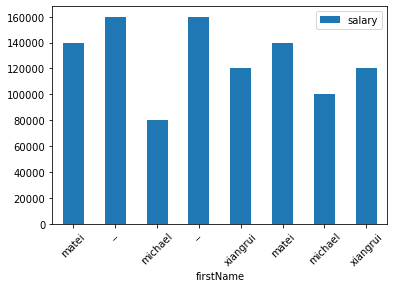

In [0]:
# Matplotlib es una librería utilizada para visualización
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
# pdDF es un DataFrame de Pandas
pdDF = nonNullDF.toPandas()
pdDF.plot(x='firstName', y='salary', kind='bar', rot=45)
# Se integran ambas librerías para generar la visualización final
display()

In [0]:
# Se elimina el archivo Parquet generado atneriormente del directorio
dbutils.fs.rm("/tmp/databricks-df-example.parquet", True)

Out[21]: True

In [0]:
# DataFrame FAQs
from pyspark.sql import functions as F
from pyspark.sql.types import *

# Se crea un archivo csv a partir del metodo put(), que si existe previamente se elimina
# En put() se define el nombre, columnas y los datos del archivo
dbutils.fs.rm("/tmp/dataframe_sample.csv", True)
dbutils.fs.put("/tmp/dataframe_sample.csv", """id|end_date|start_date|location
1|2015-10-14 00:00:00|2015-09-14 00:00:00|CA-SF
2|2015-10-15 01:00:20|2015-08-14 00:00:00|CA-SD
3|2015-10-16 02:30:00|2015-01-14 00:00:00|NY-NY
4|2015-10-17 03:00:20|2015-02-14 00:00:00|NY-NY
5|2015-10-18 04:30:00|2014-04-14 00:00:00|CA-SD
""", True)

# Se genera el dataframe a partir del csv, notar que se explicita un header y el delmitador '|'
df = spark.read.format("csv").options(header='true', delimiter = '|').load("/tmp/dataframe_sample.csv")
df.printSchema()

Wrote 272 bytes.
root
-- id: string (nullable = true)
-- end_date: string (nullable = true)
-- start_date: string (nullable = true)
-- location: string (nullable = true)

In [0]:
# En lugar de registrar una UDF, se usan las funciones integradas para realizar operaciones en las columnas.
# Esto proporcionará una mejora en el rendimiento a medida que las incorporaciones se compilan y se ejecutan en la JVM de la plataforma.

# Se convierte a tipo Date
df = df.withColumn('date', F.to_date(df.end_date))

# Se parsea la columna date, que contiene fecha y hora, para obtener solamente fecha
df = df.withColumn('date_only', F.regexp_replace(df.end_date,' (\d+)[:](\d+)[:](\d+).*$', ''))

# Split subdivide el valor con el delimitador '-' que se explicita, lo que genera un array de los elementos obtenidos
# En el ejemplo, se queda con el indice 1
df = df.withColumn('city', F.split(df.location, '-')[1])

# Se obtiene la diferencia en días de dos fechas
df = df.withColumn('date_diff', F.datediff(F.to_date(df.end_date), F.to_date(df.start_date)))

In [0]:
df.createOrReplaceTempView("sample_df")
display(sql("select * from sample_df"))

id,end_date,start_date,location,date,date_only,city,date_diff
1,2015-10-14 00:00:00,2015-09-14 00:00:00,CA-SF,2015-10-14,2015-10-14,SF,30
2,2015-10-15 01:00:20,2015-08-14 00:00:00,CA-SD,2015-10-15,2015-10-15,SD,62
3,2015-10-16 02:30:00,2015-01-14 00:00:00,NY-NY,2015-10-16,2015-10-16,NY,275
4,2015-10-17 03:00:20,2015-02-14 00:00:00,NY-NY,2015-10-17,2015-10-17,NY,245
5,2015-10-18 04:30:00,2014-04-14 00:00:00,CA-SD,2015-10-18,2015-10-18,SD,552


In [0]:
# Se convierte el DataFrame de nuevo a formato JSON para enviarlo a Kafka.
# Existe una función toJSON () subyacente que devuelve un RDD de JSON utilizando los nombres de columna y el esquema para producir los registros.
rdd_json = df.toJSON()
rdd_json.take(2)

Out[25]: ['{"id":"1","end_date":"2015-10-14 00:00:00","start_date":"2015-09-14 00:00:00","location":"CA-SF","date":"2015-10-14","date_only":"2015-10-14","city":"SF","date_diff":30}',
 '{"id":"2","end_date":"2015-10-15 01:00:20","start_date":"2015-08-14 00:00:00","location":"CA-SD","date":"2015-10-15","date_only":"2015-10-15","city":"SD","date_diff":62}']

In [0]:
# UDF toma un parámetro que incluye la columna sobre la que operar. Para hacerlo utiliza una funcion lambda
# Las funciones lambda son funciones sin nombre de una sola expresión, en el ejemplo queda definida en udf
# La función lit () crea una columna constante.
from pyspark.sql import functions as F

add_n = udf(lambda x, y: x + y, IntegerType())

# Se registra una UDF que agrega una columna al DataFrame convirtiendo la columna de identificación a un tipo de dato Integer.
df = df.withColumn('id_offset', add_n(F.lit(1000), df.id.cast(IntegerType())))

In [0]:
display(df)

id,end_date,start_date,location,date,date_only,city,date_diff,id_offset
1,2015-10-14 00:00:00,2015-09-14 00:00:00,CA-SF,2015-10-14,2015-10-14,SF,30,1001
2,2015-10-15 01:00:20,2015-08-14 00:00:00,CA-SD,2015-10-15,2015-10-15,SD,62,1002
3,2015-10-16 02:30:00,2015-01-14 00:00:00,NY-NY,2015-10-16,2015-10-16,NY,275,1003
4,2015-10-17 03:00:20,2015-02-14 00:00:00,NY-NY,2015-10-17,2015-10-17,NY,245,1004
5,2015-10-18 04:30:00,2014-04-14 00:00:00,CA-SD,2015-10-18,2015-10-18,SD,552,1005


In [0]:
# Cualquier constante utilizada por UDF pasará automáticamente a los 'workers'
N = 90
last_n_days = udf(lambda x: x < N, BooleanType())

df_filtered = df.filter(last_n_days(df.date_diff))
display(df_filtered)

id,end_date,start_date,location,date,date_only,city,date_diff,id_offset
1,2015-10-14 00:00:00,2015-09-14 00:00:00,CA-SF,2015-10-14,2015-10-14,SF,30,1001
2,2015-10-15 01:00:20,2015-08-14 00:00:00,CA-SD,2015-10-15,2015-10-15,SD,62,1002


In [0]:
# Se accede a una tabla de Hive con un DataFrame.
# Hay varias formas de definir un DataFrame a partir de una tabla registrada. 
# La sintaxis se muestra a continuación.
# Ssando una consulta SQL.
# Ambos devuelven tipos de DataFrame
df_1 = table("sample_df")
df_2 = spark.sql("select * from sample_df")

In [0]:
# Con clearCache() se borran todas las tablas almacenadas en caché en el clúster actual.
# Hay una API disponible para hacer esto a nivel global o por tabla.
sqlContext.clearCache()
sqlContext.cacheTable("sample_df")
sqlContext.uncacheTable("sample_df")

In [0]:
# I’d like to compute aggregates on columns. What’s the best way to do this?
# There’s an API named agg(*exprs) that takes a list of column names and expressions for the type of aggregation you’d like to compute. 
# Documentation is available here. You can leverage the built-in functions that mentioned above as part of the expressions for each column.
# Provide the min, count, and avg and groupBy the location column. Diplay the results

# Existe una API llamada agg (* exprs) que toma una lista de nombres de columnas y expresiones para el tipo de agregación a calcular.
# Se muestra el mínimo, el recuento, el promedio y el grupo por la columna 'location'
agg_df = df.groupBy("location").agg(F.min("id"), F.count("id"), F.avg("date_diff"))
display(agg_df)

location,min(id),count(id),avg(date_diff)
CA-SD,2,2,307.0
CA-SF,1,1,30.0
NY-NY,3,2,260.0


In [0]:
# I’d like to write out the DataFrames to Parquet, but would like to partition on a particular column.
# You can use the following APIs to accomplish this. Ensure the code does not create a large number of 
# partition columns with the datasets otherwise the overhead of the metadata can cause significant slow downs.
# If there is a SQL table back by this directory, you will need to call refresh table <table-name> to update the metadata prior to the query.

# Al escribir los DataFrames en Parquet, es posible particionar en una columna en particular.
# Es necesario asegurarse de que el particionado no se haga en exceso
# ya que la sobrecarga de los metadatos puede causar una ralentización significativa.
# Si hay una tabla SQL detrás de este directorio, necesitará llamar a refresh table <table-name> para actualizar los metadatos antes de la consulta.
df = df.withColumn('end_month', F.month('end_date'))
df = df.withColumn('end_year', F.year('end_date'))
dbutils.fs.rm("/tmp/sample_table", True)
df.write.partitionBy("end_year", "end_month").parquet("/tmp/sample_table")
display(dbutils.fs.ls("/tmp/sample_table"))

path,name,size
dbfs:/tmp/sample_table/_SUCCESS,_SUCCESS,0
dbfs:/tmp/sample_table/end_year=2015/,end_year=2015/,0


In [0]:
# Se puede usar filter () y proporcionar una sintaxis similar a como lo haría con una consulta SQL para filtrar no nulos.

null_item_schema = StructType([StructField("col1", StringType(), True),
                               StructField("col2", IntegerType(), True)])
null_df = spark.createDataFrame([("test", 1), (None, 2)], null_item_schema)
display(null_df.filter("col1 IS NOT NULL"))

col1,col2
test,1
